In [1]:
!pip3 install comet_ml

     |████████████████████████████████| 225kB 4.5MB/s 
     |████████████████████████████████| 204kB 8.5MB/s 
     |████████████████████████████████| 419kB 9.2MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=840f4706a2ef0697aa808ff73040840df2c6050b0e200a4f1995b196b2db836c
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [2]:
from comet_ml import Experiment

In [3]:
experiment = Experiment(api_key="BZppyirjvBwWdPwtOmPAwWYkp",
                        project_name="xgboost", workspace="sooner0931",
                        log_env_details=True, log_code=True)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sooner0931/xgboost/5fc52cc0a47a4087898685d2122b8f4e



In [4]:
!pip install watermark

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve

import xgboost as xgb

In [6]:
import graphviz
import missingno

import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
%load_ext watermark
%watermark --iversions

missingno 0.4.2
xgboost   0.90
graphviz  0.10.1
numpy     1.18.5
pandas    1.0.5



In [8]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
df = pd.read_csv('gdrive/My Drive/Telco_customer_churn.csv')

In [10]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [11]:
df['Churn Label'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [13]:
df.shape

(7043, 33)

In [14]:
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [15]:
for i in df.columns:
  print(f"For '{i}' \nthe unique values listed :\n{df[i].unique()}")
  print()

For 'CustomerID' 
the unique values listed :
['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']

For 'Count' 
the unique values listed :
[1]

For 'Country' 
the unique values listed :
['United States']

For 'State' 
the unique values listed :
['California']

For 'City' 
the unique values listed :
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']

For 'Zip Code' 
the unique values listed :
[90003 90005 90006 ... 96128 96134 96146]

For 'Lat Long' 
the unique values listed :
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']

For 'Latitude' 
the unique values listed :
[33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]

For 'Longitude' 
the unique values listed :
[-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]

For 'Gender' 
the unique values listed :
['Male' 'Fe

In [16]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis = 1, inplace = True)

In [17]:
for i in df.columns:
  print(i)

CustomerID
Count
Country
State
City
Zip Code
Lat Long
Latitude
Longitude
Gender
Senior Citizen
Partner
Dependents
Tenure Months
Phone Service
Multiple Lines
Internet Service
Online Security
Online Backup
Device Protection
Tech Support
Streaming TV
Streaming Movies
Contract
Paperless Billing
Payment Method
Monthly Charges
Total Charges
Churn Value


In [18]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'], axis = 1, inplace = True)

In [19]:
df.head(3)

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1


In [20]:
df.shape

(7043, 24)

xgboost does not care what's your value or column name is, i.e., Los Angles is totally OK, but we will plot the tree later, for that plotting, we changed the name and value of space into a '_'.

In [21]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [22]:
df['City'].replace(' ', '_', regex = True, inplace = True)

In [23]:
df['City'].unique()

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', ..., 'Standish',
       'Tulelake', 'Olympic_Valley'], dtype=object)

In [24]:
df.columns

Index(['City', 'Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

In [25]:
df.columns = df.columns.str.replace(' ', '_')

In [26]:
df.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')

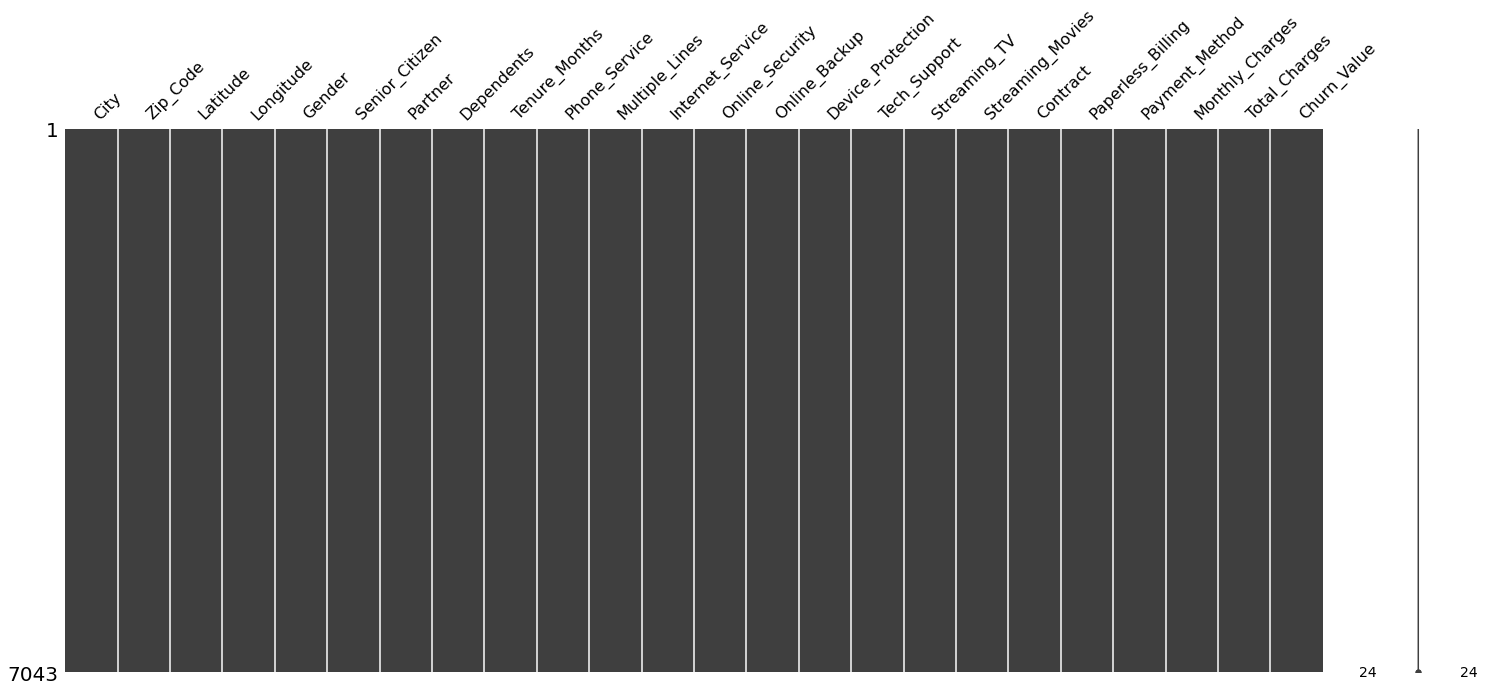

In [27]:
missingno.matrix(df)
plt.show()

In [28]:
df.isna().sum()

City                 0
Zip_Code             0
Latitude             0
Longitude            0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
dtype: int64

xgboost actually expecting NAs in a dataset, but we need to replace the NAs with 0s, one might question that how about the original values of 0s, the author of xgboost says that: it tackles this problem well enough to have our algorithm work.

In [29]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

In [30]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

ValueError: ignored

In [31]:
df.iloc[2234]

City                            San_Bernardino
Zip_Code                                 92408
Latitude                               34.0849
Longitude                             -117.258
Gender                                  Female
Senior_Citizen                              No
Partner                                    Yes
Dependents                                  No
Tenure_Months                                0
Phone_Service                               No
Multiple_Lines                No phone service
Internet_Service                           DSL
Online_Security                            Yes
Online_Backup                               No
Device_Protection                          Yes
Tech_Support                               Yes
Streaming_TV                               Yes
Streaming_Movies                            No
Contract                              Two year
Paperless_Billing                          Yes
Payment_Method       Bank transfer (automatic)
Monthly_Charg

In [32]:
len(df[df['Total_Charges'] == ' '])

11

In [33]:
df[df['Total_Charges'] == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [34]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [35]:
len(df[df['Total_Charges'] == ' '])

0

In [36]:
df['Total_Charges'].isna().sum()

0

In [37]:
df[df['Tenure_Months'] == 0]                         # cross check

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [38]:
df['Total_Charges'].dtype

dtype('O')

In [39]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

In [40]:
df['Total_Charges'].dtype

dtype('float64')

In [41]:
df['Churn_Value'].unique()

array([1, 0])

In [42]:
df.head(3)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


In [43]:
df.replace(' ', '_', regex = True, inplace = True)

In [44]:
df.head(3)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1


In [45]:
X = df.drop('Churn_Value', axis = 1).copy()
X.head(3)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50


In [46]:
y = df['Churn_Value'].copy()

In [47]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn_Value, Length: 7043, dtype: int64

In [48]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

In [49]:
X_encoded = pd.get_dummies(X, columns = ['City',
                                         'Gender',
                                         'Senior_Citizen',
                                         'Partner',
                                         'Dependents',
                                         'Phone_Service',
                                         'Multiple_Lines',
                                         'Internet_Service',
                                         'Online_Security',
                                         'Online_Backup',
                                         'Device_Protection',
                                         'Tech_Support',
                                         'Streaming_TV',
                                         'Streaming_Movies',
                                         'Contract',
                                         'Paperless_Billing',
                                         'Payment_Method'])

In [50]:
X_encoded.head(3)

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura_Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso_Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador_City,City_Amboy,City_Anaheim,City_Anderson,City_Angels_Camp,City_Angelus_Oaks,City_Angwin,City_Annapolis,City_Antelope,City_Antioch,City_Anza,City_Apple_Valley,City_Applegate,...,Senior_Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone_Service_No,Phone_Service_Yes,Multiple_Lines_No,Multiple_Lines_No_phone_service,Multiple_Lines_Yes,Internet_Service_DSL,Internet_Service_Fiber_optic,Internet_Service_No,Online_Security_No,Online_Security_No_internet_service,Online_Security_Yes,Online_Backup_No,Online_Backup_No_internet_service,Online_Backup_Yes,Device_Protection_No,Device_Protection_No_internet_service,Device_Protection_Yes,Tech_Support_No,Tech_Support_No_internet_service,Tech_Support_Yes,Streaming_TV_No,Streaming_TV_No_internet_service,Streaming_TV_Yes,Streaming_Movies_No,Streaming_Movies_No_internet_service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0


In [51]:
X_encoded.shape

(7043, 1178)

In [52]:
y.unique()

array([1, 0])

https://www.youtube.com/watch?v=GrJP9FLV3FE

35'18'' explains how missing values can be handled with xgboost algorithm

sparse matrices, only tracks 1s, do not allocate memory on 0s, this how xgboost dealing with missings while being efficient at the same time!

In [53]:
sum(y) / len(y)

0.2653698707936959

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, stratify = y)

In [55]:
sum(y_train) / len(y_train)

0.2654297614539947

In [56]:
sum(y_test) / len(y_test)

0.26519023282226006

In [57]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', missing = None, seed = 42)

clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds = 10,                 # at certain training epoch, results will halt, give it 10 rounds more to check
            eval_metric = 'aucpr',
            eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.578392
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.580597
[2]	validation_0-aucpr:0.590099
[3]	validation_0-aucpr:0.601636
[4]	validation_0-aucpr:0.608932
[5]	validation_0-aucpr:0.603821
[6]	validation_0-aucpr:0.618314
[7]	validation_0-aucpr:0.610906
[8]	validation_0-aucpr:0.620122
[9]	validation_0-aucpr:0.62495
[10]	validation_0-aucpr:0.629252
[11]	validation_0-aucpr:0.628517
[12]	validation_0-aucpr:0.650051
[13]	validation_0-aucpr:0.649035
[14]	validation_0-aucpr:0.650546
[15]	validation_0-aucpr:0.652876
[16]	validation_0-aucpr:0.654922
[17]	validation_0-aucpr:0.655347
[18]	validation_0-aucpr:0.655818
[19]	validation_0-aucpr:0.655958
[20]	validation_0-aucpr:0.656236
[21]	validation_0-aucpr:0.655564
[22]	validation_0-aucpr:0.656688
[23]	validation_0-aucpr:0.657409
[24]	validation_0-aucpr:0.656236
[25]	validation_0-aucpr:0.655347
[26]	validation_0-aucpr:0.656541
[27]	validation_0-aucpr:0.657225
[28]	validation_0-auc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

above says that stopped at 55th tree, so, the best is at 45th.

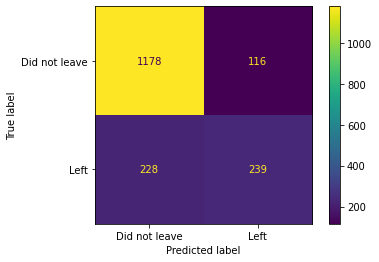

In [58]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format = 'd',
                      display_labels = ['Did not leave', 'Left'])

Not so good becoz the ppl who have left was only predicted 51% correctly

In [59]:
param_grid_1 ={
    'max_depth': [3, 4, 5],
    'learning _rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]}

In [60]:
optimal_params_1 = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'binary:logistic',
                                  seed = 42,
                                  subsample = 0.9,
                                  colsample_bytree = 0.5),
    param_grid = param_grid_1,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs =10,
    cv = 3)

In [61]:
optimal_params_1

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.5, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=0.9, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning _rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0

%time
optimal_params_1.fit(X_train,
                     y_train,
                     verbose = False,
                     early_stopping_rounds = 10,                 # at certain training epoch, results will halt, give it 10 rounds more to check
                     eval_metric = 'auc',
                     eval_set = [(X_test, y_test)])

In [62]:
param_grid_2 ={
    'max_depth': [4],
    'learning _rate': [0.1, 0.5, 1],
    'gamma': [0.25],
    'reg_lambda': [10.0, 20, 100],
    'scale_pos_weight': [3]}

In [63]:
param_grid_2

{'gamma': [0.25],
 'learning _rate': [0.1, 0.5, 1],
 'max_depth': [4],
 'reg_lambda': [10.0, 20, 100],
 'scale_pos_weight': [3]}

In [64]:
optimal_params_2 = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'binary:logistic',
                                  seed = 42,
                                  subsample = 0.9,
                                  colsample_bytree = 0.5),
    param_grid = param_grid_2,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs =10,
    cv = 3)

In [65]:
optimal_params_2

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.5, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=0.9, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'gamma': [0.25], 'learning _rate': [0.1, 0.5, 1],
                         'max_depth': [4], 'reg_lambda': [10.0, 20, 100],
                         'sc

In [66]:
%time
optimal_params_2.fit(X_train,
                     y_train,
                     verbose = False,
                     early_stopping_rounds = 10,                 
                     eval_metric = 'auc',
                     eval_set = [(X_test, y_test)])

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.5, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=0.9, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'gamma': [0.25], 'learning _rate': [0.1, 0.5, 1],
                         'max_depth': [4], 'reg_lambda': [10.0, 20, 100],
                         'sc

In [67]:
optimal_params_2.best_params_

{'gamma': 0.25,
 'learning _rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 100,
 'scale_pos_weight': 3}

In [68]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', 
                            seed = 42,
                            gamma = 0.25,
                            learn_rate = 0.1,
                            max_depth = 4,
                            reg_lambda = 100,
                            scale_pos_weight = 3,
                            subsample = 0.9,
                            colsample_bytree = 0.5
                            )

In [69]:
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds = 10,                 
            eval_metric = 'aucpr',
            eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.477919
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.569095
[2]	validation_0-aucpr:0.602628
[3]	validation_0-aucpr:0.61737
[4]	validation_0-aucpr:0.613356
[5]	validation_0-aucpr:0.612386
[6]	validation_0-aucpr:0.619889
[7]	validation_0-aucpr:0.621884
[8]	validation_0-aucpr:0.621506
[9]	validation_0-aucpr:0.62228
[10]	validation_0-aucpr:0.622495
[11]	validation_0-aucpr:0.623476
[12]	validation_0-aucpr:0.622852
[13]	validation_0-aucpr:0.62548
[14]	validation_0-aucpr:0.626154
[15]	validation_0-aucpr:0.626782
[16]	validation_0-aucpr:0.627242
[17]	validation_0-aucpr:0.627662
[18]	validation_0-aucpr:0.628065
[19]	validation_0-aucpr:0.63012
[20]	validation_0-aucpr:0.630483
[21]	validation_0-aucpr:0.632459
[22]	validation_0-aucpr:0.632998
[23]	validation_0-aucpr:0.639247
[24]	validation_0-aucpr:0.639287
[25]	validation_0-aucpr:0.639345
[26]	validation_0-aucpr:0.640048
[27]	validation_0-aucpr:0.644362
[28]	validation_0-aucpr:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25,
              learn_rate=0.1, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=100, scale_pos_weight=3, seed=42,
              silent=None, subsample=0.9, verbosity=1)

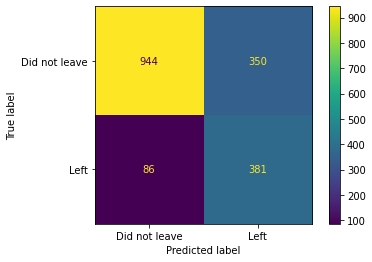

In [70]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format = 'd',
                      display_labels = ['Did not leave', 'Left'])

This time, 80%+ of left ppl were correctly predicted, at the expense of worsening the correct prediction of the ppl not leaving, but the ppl who left is the core problem of this business settings, so we were better off.

In [71]:
clf_xgb_plt = xgb.XGBClassifier(objective = 'binary:logistic', 
                            seed = 42,
                            gamma = 0.25,
                            learn_rate = 0.1,
                            max_depth = 4,
                            reg_lambda = 10,
                            scale_pos_weight = 3,
                            subsample = 0.9,
                            colsample_bytree = 0.5,
                            n_estimators = 1 # get only the first tree, to see gain, cover etc.
                            )

In [72]:
clf_xgb_plt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25,
              learn_rate=0.1, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=3, seed=42,
              silent=None, subsample=0.9, verbosity=1)

In [73]:
bst = clf_xgb_plt.get_booster()

In [74]:
bst

In [75]:
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
  print('%s: ' % importance_type, bst.get_score(importance_type = importance_type))

weight:  {'Contract_Month-to-month': 1, 'Streaming_Movies_Yes': 1, 'Payment_Method_Electronic_check': 2, 'Zip_Code': 2, 'Tech_Support_Yes': 3, 'Paperless_Billing_No': 1, 'Longitude': 3, 'Online_Security_No_internet_service': 1, 'Gender_Female': 1}
gain:  {'Contract_Month-to-month': 1631.77637, 'Streaming_Movies_Yes': 67.3808594, 'Payment_Method_Electronic_check': 50.922088650000006, 'Zip_Code': 5.201111790000001, 'Tech_Support_Yes': 23.726112366666666, 'Paperless_Billing_No': 9.83537102, 'Longitude': 6.548796336666666, 'Online_Security_No_internet_service': 213.820374, 'Gender_Female': 1.0939008}
cover:  {'Contract_Month-to-month': 1820.25, 'Streaming_Movies_Yes': 609.5, 'Payment_Method_Electronic_check': 701.25, 'Zip_Code': 153.5, 'Tech_Support_Yes': 466.0, 'Paperless_Billing_No': 111.5, 'Longitude': 138.5, 'Online_Security_No_internet_service': 1210.75, 'Gender_Female': 6.0}
total_gain:  {'Contract_Month-to-month': 1631.77637, 'Streaming_Movies_Yes': 67.3808594, 'Payment_Method_Elect

In [76]:
node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}

In [77]:
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

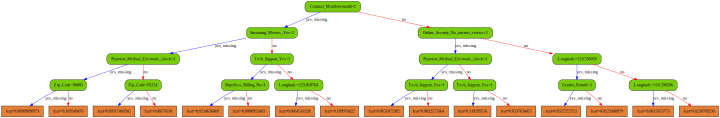

In [78]:
xgb.to_graphviz(clf_xgb_plt,
                num_trees = 0,
                size = "10, 10",
                condition_node_params = node_params,
                leaf_node_params = leaf_params)

In [79]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sooner0931/xgboost/5fc52cc0a47a4087898685d2122b8f4e
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     validation_0_auc [100]  : (0.770266, 0.861775)
COMET INFO:     validation_0_aucpr [96] : (0.477919, 0.665552)
COMET INFO:   Parameters:
COMET INFO:     base_score        : 0.5
COMET INFO:     booster           : gbtree
COMET INFO:     colsample_bylevel : 1
COMET INFO:     colsample_bynode  : 1
COMET INFO:     colsample_bytree  : 1
COMET INFO:     eval_metric       : aucpr
COMET INFO:     gamma             : 1
COMET INFO:     learning_rate     : 0.1
COMET INFO:     max_delta_step    : 1
COMET INFO:     max_depth         : 3
COMET INFO:     min_child_weight  : 1
COMET INFO:     n_estimators      : 100
COMET INFO:     nthread           : 1
CO